# Sales Analysis

Sales analysis using fictional, generated data

## 1. Import Data

12 csv files needed to import and merge as one file

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import os
import glob

In [3]:
# get a list of the csv files
files = glob.glob("*SalesAnalysis/*")
file_list = [file for file in files]
file_list

['SalesAnalysis\\Sales_April_2019.csv',
 'SalesAnalysis\\Sales_August_2019.csv',
 'SalesAnalysis\\Sales_December_2019.csv',
 'SalesAnalysis\\Sales_February_2019.csv',
 'SalesAnalysis\\Sales_January_2019.csv',
 'SalesAnalysis\\Sales_July_2019.csv',
 'SalesAnalysis\\Sales_June_2019.csv',
 'SalesAnalysis\\Sales_March_2019.csv',
 'SalesAnalysis\\Sales_May_2019.csv',
 'SalesAnalysis\\Sales_November_2019.csv',
 'SalesAnalysis\\Sales_October_2019.csv',
 'SalesAnalysis\\Sales_September_2019.csv']

In [4]:
# get a list of lists of the dataframes
dfs = file_list[:]

for index, file in enumerate(files):
    dfs[index] = pd.read_csv(file)

In [5]:
# now combine all dfs into one df
combined = pd.concat(dfs, axis=0, ignore_index=True)

In [6]:
combined.shape

(186850, 6)

In [7]:
combined.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
combined['Product'].unique()

array(['USB-C Charging Cable', nan, 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor',
       'Product'], dtype=object)

In [9]:
combined.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

## 2. Clean Data

### 2.1 Remove Nulls

In [10]:
combined.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
combined[combined.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
combined = combined.dropna(how='any')

In [13]:
combined.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [14]:
combined.shape

(186305, 6)

### 2.2 Change data types to correct data type: objects to int, float, datetime

#### 2.21 Order ID and Quantity Ordered to int

In [15]:
combined['Order ID'].to_list()

['176558',
 '176559',
 '176560',
 '176560',
 '176561',
 '176562',
 '176563',
 '176564',
 '176565',
 '176566',
 '176567',
 '176568',
 '176569',
 '176570',
 '176571',
 '176572',
 '176573',
 '176574',
 '176574',
 '176575',
 '176576',
 '176577',
 '176578',
 '176579',
 '176580',
 '176581',
 '176582',
 '176583',
 '176584',
 '176585',
 '176585',
 '176586',
 '176586',
 '176587',
 '176588',
 '176589',
 '176590',
 '176591',
 '176592',
 '176593',
 '176594',
 '176595',
 '176596',
 '176597',
 '176598',
 '176599',
 '176600',
 '176601',
 '176602',
 '176603',
 '176604',
 '176605',
 '176606',
 '176607',
 '176608',
 '176609',
 '176610',
 '176611',
 '176612',
 '176613',
 '176614',
 '176615',
 '176616',
 '176617',
 '176618',
 '176619',
 '176620',
 '176621',
 '176622',
 '176623',
 '176624',
 '176625',
 '176626',
 '176627',
 '176628',
 '176629',
 '176630',
 '176631',
 '176632',
 '176633',
 '176634',
 '176635',
 '176636',
 '176637',
 '176638',
 '176639',
 '176640',
 '176641',
 '176642',
 '176643',
 '176644',

In [16]:
combined['Order ID'] = pd.to_numeric(combined['Order ID'])

ValueError: Unable to parse string "Order ID" at position 517

In [17]:
combined.at[519, 'Order ID']

'Order ID'

Found that there is a row in the data that is the same as the title row. Need to delete that row

In [18]:
combined[combined['Order ID'] == 'Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [19]:
combined = combined[combined['Order ID'] != 'Order ID']

In [20]:
combined.shape

(185950, 6)

In [21]:
combined['Order ID'] = combined['Order ID'].astype(int)

In [22]:
combined['Order ID'].dtype

dtype('int32')

In [23]:
combined['Quantity Ordered'] = combined['Quantity Ordered'].astype(int)
combined['Price Each'] = combined['Price Each'].astype(float)
combined['Order Date'] = combined['Order Date'].astype('datetime64[ns]')

In [24]:
combined.dtypes

Order ID                     int32
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

## 3. Analysis

### 3.1 What was the best month for sales and how much was earned that month?

#### 3.1.1 Split date column into day, month and year

In [25]:
import datetime as datetime

In [26]:
combined['Day'] = combined['Order Date'].dt.day
combined['Month'] = combined['Order Date'].dt.month
combined['Year'] = combined['Order Date'].dt.year

In [27]:
combined.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019


#### 3.1.2 Add a new column of quantity ordered multiplied by price as revenue

In [28]:
combined['Revenue'] = combined['Quantity Ordered'] * combined['Price Each']

In [29]:
combined.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Revenue
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019,23.9


In [30]:
combined.dtypes

Order ID                     int32
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Day                          int64
Month                        int64
Year                         int64
Revenue                    float64
dtype: object

#### 3.1.3 Group data by month

In [31]:
by_month = combined[['Month', 'Revenue']].groupby(['Month']).sum().sort_values('Revenue', ascending=False).reset_index()

In [32]:
revenue_by_month = combined[['Month', 'Revenue']].groupby(['Month']).sum().reset_index().round(2)
revenue_by_month

,Month,Revenue
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


Most revenue generated in December: $4613443.34

#### 3.1.4 Comparison through visualisation

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# set seaborn theme
sns.set_theme()

# increase the size
sns.set(rc={'figure.figsize':(12,10)})

In [35]:
# change month from number to name
import calendar
revenue_by_month['Month'] = revenue_by_month['Month'].apply(lambda x: calendar.month_abbr[x])

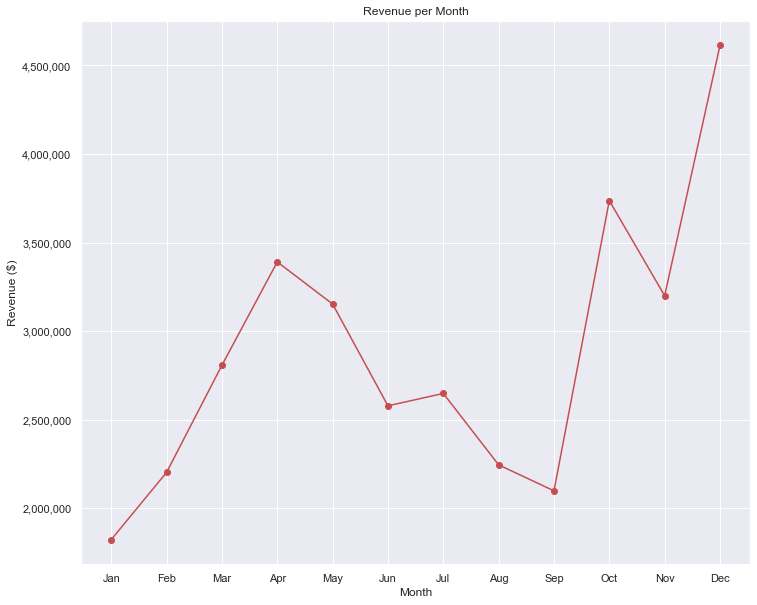

In [36]:
fig = plt.figure()
ax = plt.axes()

x = revenue_by_month['Month']
y = revenue_by_month['Revenue']

plt.plot(x, y, marker='o', color='r')

# removes scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title("Revenue per Month")
plt.xlabel("Month")
plt.ylabel("Revenue ($)");

### 3.2 What city has the highest number of sales?

#### 3.2.1 Split address column appropriately

In [37]:
combined.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Revenue
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019,23.9


In [38]:
combined['Street'] = [x.split(',')[0] for x in combined['Purchase Address']]
combined['City'] = [x.split(',')[1] for x in combined['Purchase Address']]
combined['State'] = [x.split(',')[2][0:3] for x in combined['Purchase Address']]
combined['Postal Code'] = [x.split(',')[2][3:] for x in combined['Purchase Address']]

In [39]:
combined.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Revenue,Street,City,State,Postal Code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019,23.9,917 1st St,Dallas,TX,75001


In [40]:
combined['City'].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

#### 3.2.2 Group by city

In [41]:
by_city = combined[['City', 'State', 'Revenue']].groupby(['City', 'State']).sum().sort_values('Revenue', ascending=False).reset_index().round(2)
by_city

,City,State,Revenue
0,San Francisco,CA,8262203.91
1,Los Angeles,CA,5452570.80
2,New York City,NY,4664317.43
3,Boston,MA,3661642.01
4,Atlanta,GA,2795498.58
5,Dallas,TX,2767975.40
6,Seattle,WA,2747755.48
7,Portland,OR,1870732.34
8,Austin,TX,1819581.75
9,Portland,ME,449758.27


In [42]:
combined['Revenue'].dtype

dtype('float64')

In [43]:
by_city['City State'] = by_city['City'] + by_city['State']

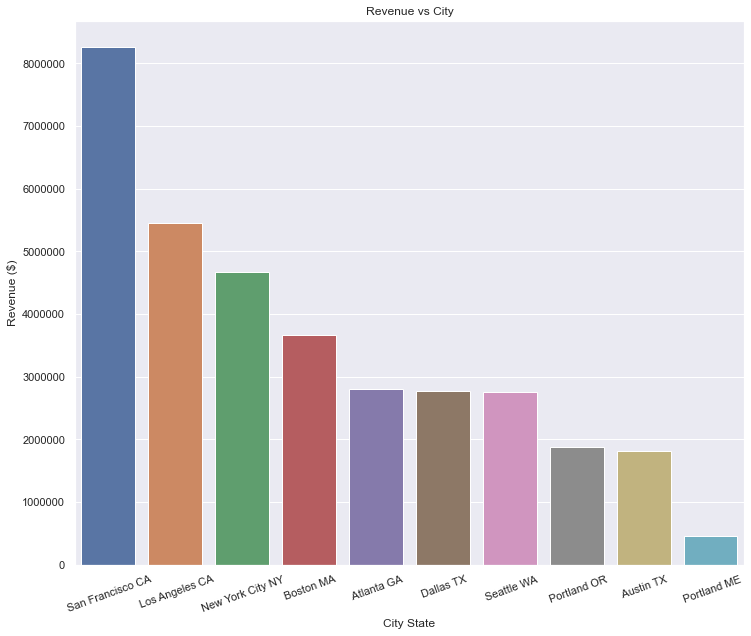

In [71]:
bar_chart = sns.barplot(x='City State', y='Revenue', data=by_city).set(title='Revenue vs City')

# gets rid of scientific notation
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

# increase the size
sns.set(rc={'figure.figsize':(12,10)})

# rename y
plt.ylabel('Revenue ($)')

plt.xticks(rotation=20)
plt.show()

### 3.3 What time of day should be display advertisements to maximise likelihood of customer buying?

#### 3.3.1 Split Order Date by time 

In [45]:
combined.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Revenue,Street,City,State,Postal Code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019,23.90,917 1st St,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",7,4,2019,99.99,682 Chestnut St,Boston,MA,02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,600.00,669 Spruce St,Los Angeles,CA,90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,11.99,669 Spruce St,Los Angeles,CA,90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",30,4,2019,11.99,333 8th St,Los Angeles,CA,90001


In [46]:
combined['Hour of Day'] = combined['Order Date'].dt.hour
combined.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Revenue,Street,City,State,Postal Code,Hour of Day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019,23.9,917 1st St,Dallas,TX,75001,8


#### 3.3.2 Group by time of day

In [47]:
by_time_of_day = combined[['Hour of Day', 'Quantity Ordered']].groupby(['Hour of Day']).count().reset_index()
by_time_of_day.head()

,Hour of Day,Quantity Ordered
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854


In [48]:
by_time_of_day['Hour of Day'].dtype

dtype('int64')

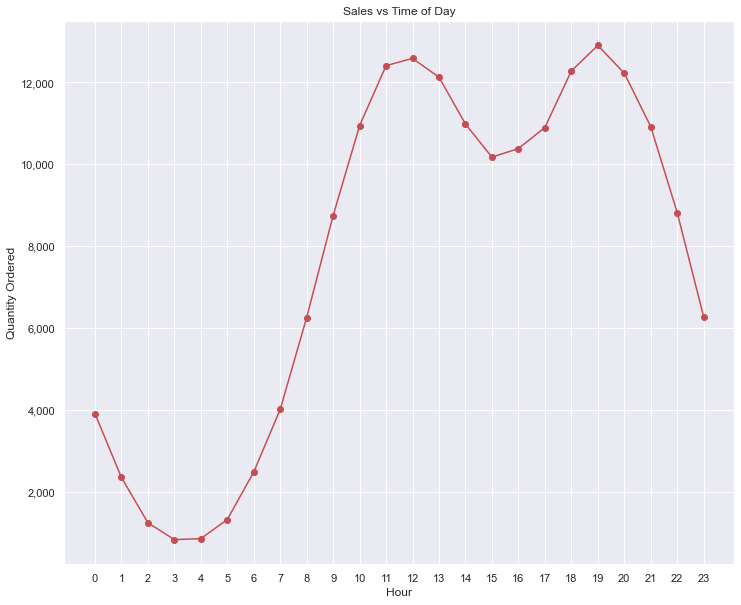

In [49]:
fig = plt.figure()
ax = plt.axes()

x = by_time_of_day['Hour of Day']
y = by_time_of_day['Quantity Ordered']

plt.plot(x, y, marker='o', color='r')

# removes scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title("Sales vs Time of Day")
plt.xlabel("Hour")
plt.ylabel("Quantity Ordered");
plt.xticks(by_time_of_day['Hour of Day'])
plt.show()

#### 3.3.3 By Day of Month

In [50]:
combined['Day of Month'] = combined['Order Date'].dt.day
combined.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Revenue,Street,City,State,Postal Code,Hour of Day,Day of Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019,23.9,917 1st St,Dallas,TX,75001,8,19


In [51]:
by_day = combined[['Day of Month', 'Quantity Ordered']].groupby(['Day of Month']).count().reset_index()
by_day.head()

,Day of Month,Quantity Ordered
0,1,6051
1,2,6197
2,3,5819
3,4,6066
4,5,6020


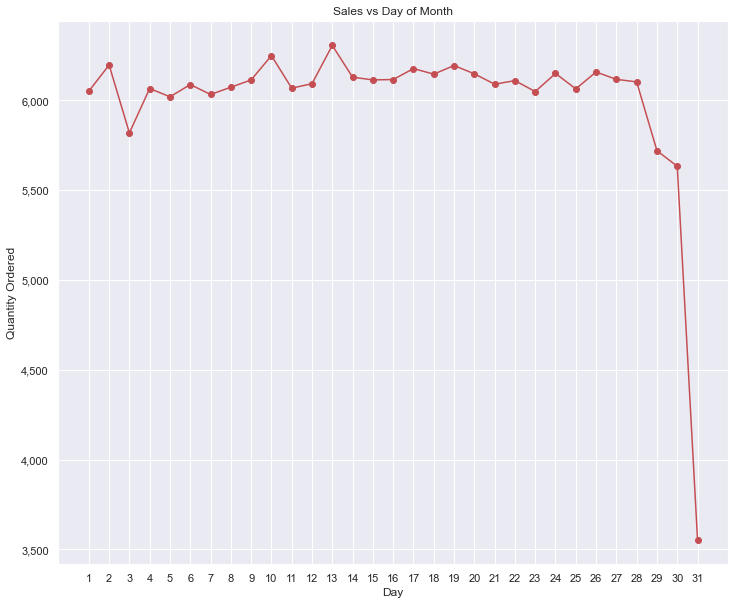

In [52]:
fig = plt.figure()
ax = plt.axes()

x = by_day['Day of Month']
y = by_day['Quantity Ordered']

plt.plot(x, y, marker='o', color='r')

# removes scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title("Sales vs Day of Month")
plt.xlabel("Day")
plt.ylabel("Quantity Ordered");
plt.xticks(by_day['Day of Month'])
plt.show()

Only 7 months of the year have 31 days which is why there is a drop off.

### 3.4 What products are most often sold together?

In [53]:
combined.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Revenue,Street,City,State,Postal Code,Hour of Day,Day of Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019,23.90,917 1st St,Dallas,TX,75001,8,19
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",7,4,2019,99.99,682 Chestnut St,Boston,MA,02215,22,7


In [54]:
combined[['Order ID', 'Product', 'Order Date', 'Purchase Address']]

,Order ID,Product,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...
186845,259353,AAA Batteries (4-pack),2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


#### 3.4.1 Identify duplicates

In [55]:
most_sold_together = combined[['Order ID', 'Product', 'Order Date', 'Purchase Address']]
most_sold_together

,Order ID,Product,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...
186845,259353,AAA Batteries (4-pack),2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [56]:
most_sold_together.duplicated(['Order ID'])

0         False
2         False
3         False
4          True
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 185950, dtype: bool

Look at duplicate ID

In [57]:
duplicates = pd.concat(g for _, g in most_sold_together.groupby("Order ID") if len(g) > 1)
duplicates

,Order ID,Product,Order Date,Purchase Address
67588,141275,USB-C Charging Cable,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301"
67589,141275,Wired Headphones,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301"
67604,141290,Apple Airpods Headphones,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001"
67605,141290,AA Batteries (4-pack),2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001"
67680,141365,Vareebadd Phone,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001"
...,...,...,...,...
55422,319584,Wired Headphones,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035"
55434,319596,iPhone,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001"
55435,319596,Lightning Charging Cable,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001"
55470,319631,34in Ultrawide Monitor,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301"


#### 3.4.2 Group By Order ID

In [58]:
duplicates['Product Count'] = 0

In [59]:
tester = duplicates.groupby(['Order ID'], as_index = False).agg({'Product': ' AND '.join, 'Order Date': 'first', 'Purchase Address': 'first', 'Product Count':'count'})
tester

,Order ID,Product,Order Date,Purchase Address,Product Count
0,141275,USB-C Charging Cable AND Wired Headphones,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",2
1,141290,Apple Airpods Headphones AND AA Batteries (4-p...,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",2
2,141365,Vareebadd Phone AND Wired Headphones,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",2
3,141384,Google Phone AND USB-C Charging Cable,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",2
4,141450,Google Phone AND Bose SoundSport Headphones,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",2
...,...,...,...,...,...
7131,319536,Macbook Pro Laptop AND Wired Headphones,2019-12-16 09:59:00,"346 Elm St, Seattle, WA 98101",2
7132,319556,Google Phone AND Wired Headphones,2019-12-22 08:23:00,"848 7th St, Austin, TX 73301",2
7133,319584,iPhone AND Wired Headphones,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",2
7134,319596,iPhone AND Lightning Charging Cable,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",2


In [60]:
tester['Number of Combination Purchase'] = 0
tester.groupby('Product', as_index=False).agg({'Order ID': 'first', 'Order Date': 'first', 'Purchase Address': 'first', 'Product Count':'first', 'Number of Combination Purchase': 'count'}).sort_values('Number of Combination Purchase', ascending=False)

,Product,Order ID,Order Date,Purchase Address,Product Count,Number of Combination Purchase
342,iPhone AND Lightning Charging Cable,141738,2019-01-14 20:53:00,"183 Cherry St, Atlanta, GA 30301",2,882
173,Google Phone AND USB-C Charging Cable,141384,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",2,856
363,iPhone AND Wired Headphones,141795,2019-01-19 20:31:00,"383 Jefferson St, San Francisco, CA 94016",2,361
299,Vareebadd Phone AND USB-C Charging Cable,142144,2019-01-04 04:31:00,"399 Lincoln St, New York City, NY 10001",2,312
191,Google Phone AND Wired Headphones,141965,2019-01-09 13:55:00,"303 10th St, Boston, MA 02215",2,303
...,...,...,...,...,...,...
197,LG Dryer AND 27in FHD Monitor,223844,2019-07-04 20:42:00,"567 Dogwood St, Boston, MA 02215",2,1
196,LG Dryer AND 27in 4K Gaming Monitor,277548,2019-10-06 04:45:00,"455 River St, Atlanta, GA 30301",2,1
194,Google Phone AND Wired Headphones AND USB-C Ch...,151568,2019-02-17 15:41:00,"463 Highland St, Los Angeles, CA 90001",3,1
193,Google Phone AND Wired Headphones AND Macbook ...,227400,2019-07-29 20:00:00,"941 Sunset St, Portland, OR 97035",3,1


In [61]:
# verification

In [62]:
most_sold_together = duplicates[['Order ID', 'Product']].groupby(['Order ID'], as_index = False).agg({'Product': ' AND '.join})
most_sold_together

,Order ID,Product
0,141275,USB-C Charging Cable AND Wired Headphones
1,141290,Apple Airpods Headphones AND AA Batteries (4-p...
2,141365,Vareebadd Phone AND Wired Headphones
3,141384,Google Phone AND USB-C Charging Cable
4,141450,Google Phone AND Bose SoundSport Headphones
...,...,...
7131,319536,Macbook Pro Laptop AND Wired Headphones
7132,319556,Google Phone AND Wired Headphones
7133,319584,iPhone AND Wired Headphones
7134,319596,iPhone AND Lightning Charging Cable


#### 3.4.3 Group by Product and count to see which combination of items are bought the most

In [63]:
count_items = most_sold_together.groupby(['Product']).count().sort_values('Order ID', ascending=False).reset_index().head()
count_items

,Product,Order ID
0,iPhone AND Lightning Charging Cable,882
1,Google Phone AND USB-C Charging Cable,856
2,iPhone AND Wired Headphones,361
3,Vareebadd Phone AND USB-C Charging Cable,312
4,Google Phone AND Wired Headphones,303


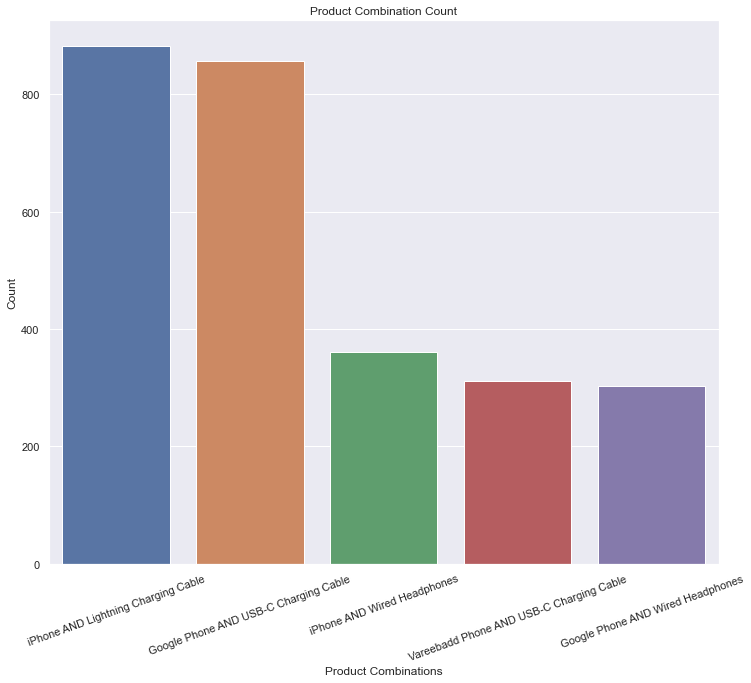

In [64]:
count_chart = sns.barplot(x='Product', y='Order ID', data=count_items).set(title='Product Combination Count')

# gets rid of scientific notation
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

# increase the size
sns.set(rc={'figure.figsize':(12,10)})

# rename y
plt.ylabel('Count')
plt.xlabel('Product Combinations')
plt.xticks(rotation=20)
plt.show()

####  3.4.4 Brief look at Order ID's which had more than two products bought at the same time

In [65]:
# this shows order ID's which had more than two products bought at the same time
most_sold_together[most_sold_together['Product'].str.count('AND') > 2]

,Order ID,Product
784,160873,iPhone AND Lightning Charging Cable AND Apple ...
996,165665,Google Phone AND USB-C Charging Cable AND Wire...
1489,178158,Google Phone AND USB-C Charging Cable AND Wire...
2111,193511,Google Phone AND USB-C Charging Cable AND Bose...
2145,194253,iPhone AND Lightning Charging Cable AND Wired ...
2252,196615,Google Phone AND USB-C Charging Cable AND Bose...
2929,212334,iPhone AND Lightning Charging Cable AND Apple ...
3495,226625,Google Phone AND USB-C Charging Cable AND Wire...
3835,235798,Google Phone AND USB-C Charging Cable AND Wire...
4105,242936,iPhone AND Lightning Charging Cable AND Apple ...


### 3.4 What product sold the most and why do you think it sold the most?

In [66]:
combined.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Revenue,Street,City,State,Postal Code,Hour of Day,Day of Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019,23.9,917 1st St,Dallas,TX,75001,8,19


#### 3.4.1 Group by product and quantity ordered

In [67]:
sold_the_most = combined[['Product', 'Quantity Ordered', 'Price Each']].groupby('Product', as_index=False).agg({'Quantity Ordered': 'sum', 'Price Each':'first'}).sort_values('Quantity Ordered', ascending=False)
sold_the_most.head()

,Product,Quantity Ordered,Price Each
5,AAA Batteries (4-pack),31017,2.99
4,AA Batteries (4-pack),27635,3.84
15,USB-C Charging Cable,23975,11.95
12,Lightning Charging Cable,23217,14.95
17,Wired Headphones,20557,11.99


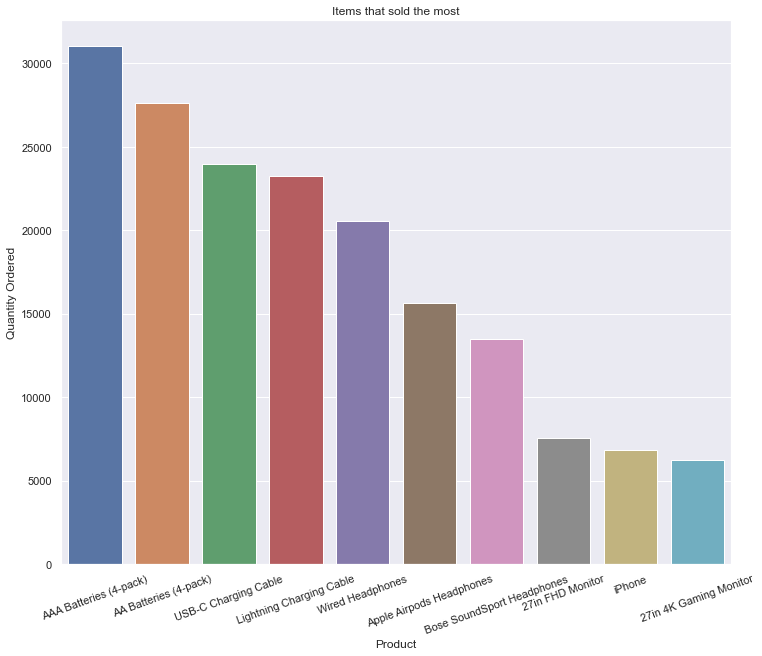

In [68]:
count_chart = sns.barplot(x='Product', y='Quantity Ordered', data=sold_the_most.head(10)).set(title='Items that sold the most')

# gets rid of scientific notation
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

# increase the size
sns.set(rc={'figure.figsize':(12,10)})

# rename y
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(rotation=20)
plt.show()

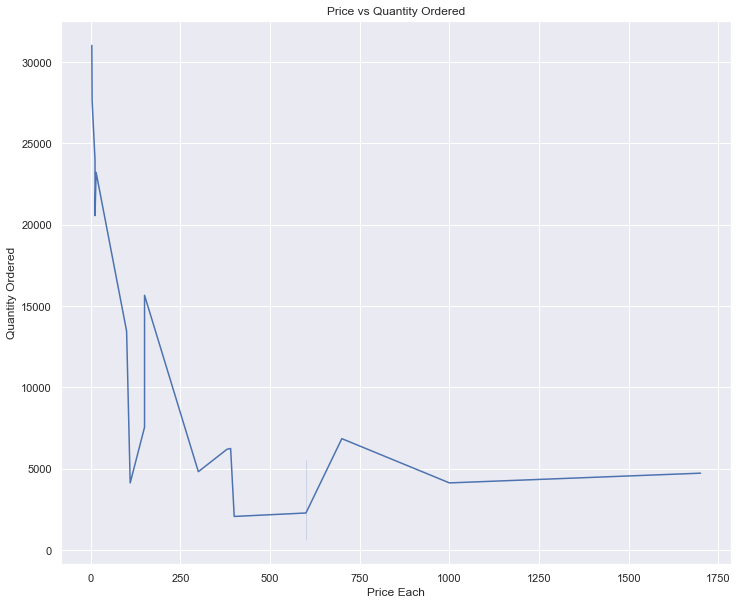

In [69]:
sns.lineplot(x='Price Each', y='Quantity Ordered', data=sold_the_most).set(title='Price vs Quantity Ordered')
plt.show()

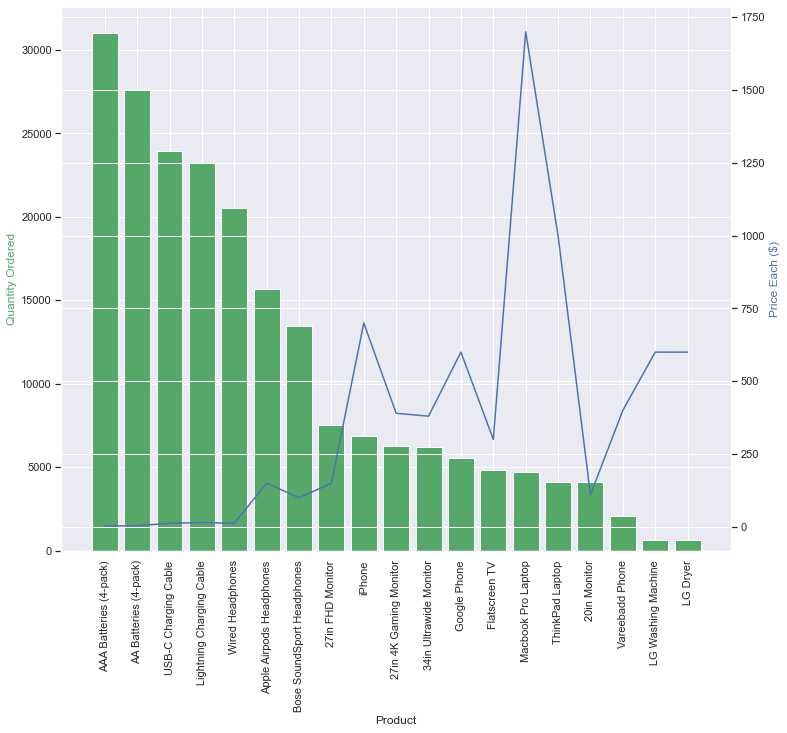

In [70]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(sold_the_most['Product'], sold_the_most['Quantity Ordered'], color='g')
ax2.plot(sold_the_most['Product'], sold_the_most['Price Each'], 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each ($)', color='b')

ax1.set_xticklabels(sold_the_most['Product'], rotation='vertical')
plt.show()

The items that are ordered the most are the cheaper ones